**🗓️Adjusted US Stock Portfolio 2025**

**📈 Optimal Portfolio Analysis: Mag7 + SPY + QQQ**

**📖Stock Data Used:** 
- **Magnificent 7 Stocks**: `AAPL`, `AMZN`, `GOOG`, `META`, `MSFT`, `NVDA`, `TSLA`
- **Benchmark Top ETF**: `SPY`, `QQQ`

***🎯 Goals***
1. **Construct a Portfolio** using **Mag7, SPY, and QQQ**, optimizing based on **risk & return** using **Efficient Frontier (EPF)**.  
2. **Calculate Expected Return & Volatility** for each stock and ETF. 💵
3. **Build the Efficient Portfolio Frontier** to determine the optimal allocation. 🔨
4. **Run Monte Carlo Simulations** to explore possible weight distributions. 🤖
5. **Compare the returns** of all 9 assets and analyze their performance. 🔎

## Import necessary library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from datetime import date, timedelta

## Collect the data

Set the start date to January 2023 as the date of Mag7 is known broadly and get 1 years data

In [3]:
#end_date = date.today().strftime("%Y-%m-%d")
#start_date = (date.today() - timedelta(days=10*365)).strftime("%Y-%m-%d")
end_date = '2024-01-01'
start_date = "2023-01-01"

Collect the neccessary data such:
- Open
- Close
- High
- Low
- Volume 
- Dividen

In [4]:
tickers = ["AAPL", "TSLA", "NVDA", "META", "AMZN", "MSFT", "GOOG", 'SPY', 'QQQ']
df = yf.download(tickers, start=start_date, end=end_date, progress=False)
df.columns = df.columns.to_flat_index()  # Flatten Multi-Index
df.columns = ['_'.join(col) for col in df.columns]  # Gabungkan header multi-index
df = df.reset_index()  # Reset index untuk mengubah Date menjadi kolom
df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOG,Close_META,Close_MSFT,Close_NVDA,Close_QQQ,Close_SPY,Close_TSLA,...,Open_TSLA,Volume_AAPL,Volume_AMZN,Volume_GOOG,Volume_META,Volume_MSFT,Volume_NVDA,Volume_QQQ,Volume_SPY,Volume_TSLA
0,2023-01-03,123.632530,85.820000,89.378853,124.265312,235.711716,14.304595,261.113464,370.367889,108.099998,...,118.470001,112117500,76706000,20738500,35528500,25740000,401277000,42335300,74850700,231402800
1,2023-01-04,124.907707,85.139999,88.392395,126.885315,225.400940,14.738279,262.357391,373.227264,113.639999,...,109.110001,89113600,68885100,27046500,32397100,50623400,431324000,47754900,85934100,180389000
2,2023-01-05,123.583092,83.120003,86.459335,126.456947,218.720551,14.254632,258.250366,368.967407,110.339996,...,110.510002,80962700,67930800,23136100,25447100,39585600,389168000,45396700,76970500,157986300
3,2023-01-06,128.130249,86.080002,87.844376,129.525223,221.298218,14.848201,265.378510,377.428589,113.059998,...,103.000000,87754700,83303400,26612600,27584500,43613600,405044000,54659700,104189600,220911100
4,2023-01-09,128.654175,87.360001,88.482086,128.977325,223.452881,15.616642,267.096344,377.214630,119.769997,...,118.959999,70790800,65266100,22996700,26649100,27369800,504231000,45568700,73978100,190284000


In [5]:
df_melted = df.melt(id_vars=["Date"], 
                    var_name="Attribute", 
                    value_name="Value")

df_melted[["Metric", "Ticker"]] = df_melted["Attribute"].str.split("_", expand=True)
df_melted = df_melted.drop(columns=["Attribute"]) 
df_melted = df_melted.pivot(index=["Date", "Ticker"], columns="Metric", values="Value").reset_index()
df_melted.columns.name = None
df_melted


,Date,Ticker,Close,High,Low,Open,Volume
0,2023-01-03,AAPL,123.632530,129.395518,122.742873,128.782649,112117500.0
1,2023-01-03,AMZN,85.820000,86.959999,84.209999,85.459999,76706000.0
2,2023-01-03,GOOG,89.378853,91.222236,88.701287,89.508392,20738500.0
3,2023-01-03,META,124.265312,125.889114,121.814674,122.352620,35528500.0
4,2023-01-03,MSFT,235.711716,241.782092,233.566906,239.155204,25740000.0
...,...,...,...,...,...,...,...
2245,2023-12-29,MSFT,373.248871,374.360553,370.707875,373.209159,18723000.0
2246,2023-12-29,NVDA,49.507965,49.982833,48.737184,49.798883,389293000.0
2247,2023-12-29,QQQ,407.100708,409.208209,405.172166,408.850320,42633400.0
2248,2023-12-29,SPY,469.290253,470.988470,467.305699,470.455301,122234100.0


Collect the dividend data then merge them

In [6]:
dividends = {ticker: yf.Ticker(ticker).dividends for ticker in tickers}
div_df = pd.DataFrame(dividends)
div_df = div_df.reset_index()
div_df = div_df.rename(columns={"Date": "Dividend_Date"})
div_df['Dividend_Date'] = pd.to_datetime(div_df['Dividend_Date']).dt.strftime("%Y-%m-%d")

In [7]:
div = div_df.melt(id_vars=["Dividend_Date"], 
                  var_name="Ticker", 
                  value_name="Dividend")
div['Dividend_Date'] = pd.to_datetime(div["Dividend_Date"])

df = df_melted.merge(div, left_on=['Date', 'Ticker'], right_on=["Dividend_Date", "Ticker"], how="left", suffixes=("", "_div")) 

df = df.drop(columns=["Dividend_Date"])
df = df.fillna(0)
df

,Date,Ticker,Close,High,Low,Open,Volume,Dividend
0,2023-01-03,AAPL,123.632530,129.395518,122.742873,128.782649,112117500.0,0.0
1,2023-01-03,AMZN,85.820000,86.959999,84.209999,85.459999,76706000.0,0.0
2,2023-01-03,GOOG,89.378853,91.222236,88.701287,89.508392,20738500.0,0.0
3,2023-01-03,META,124.265312,125.889114,121.814674,122.352620,35528500.0,0.0
4,2023-01-03,MSFT,235.711716,241.782092,233.566906,239.155204,25740000.0,0.0
...,...,...,...,...,...,...,...,...
2245,2023-12-29,MSFT,373.248871,374.360553,370.707875,373.209159,18723000.0,0.0
2246,2023-12-29,NVDA,49.507965,49.982833,48.737184,49.798883,389293000.0,0.0
2247,2023-12-29,QQQ,407.100708,409.208209,405.172166,408.850320,42633400.0,0.0
2248,2023-12-29,SPY,469.290253,470.988470,467.305699,470.455301,122234100.0,0.0


## Lets visualize and look for the trend over years

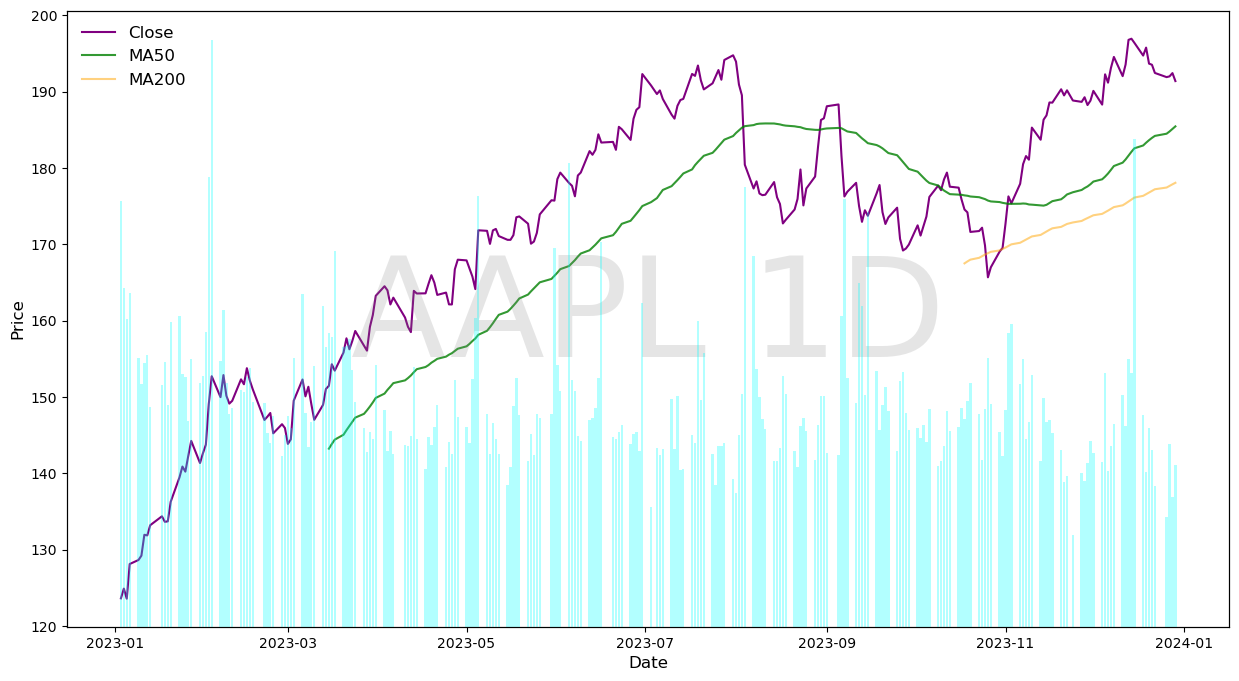

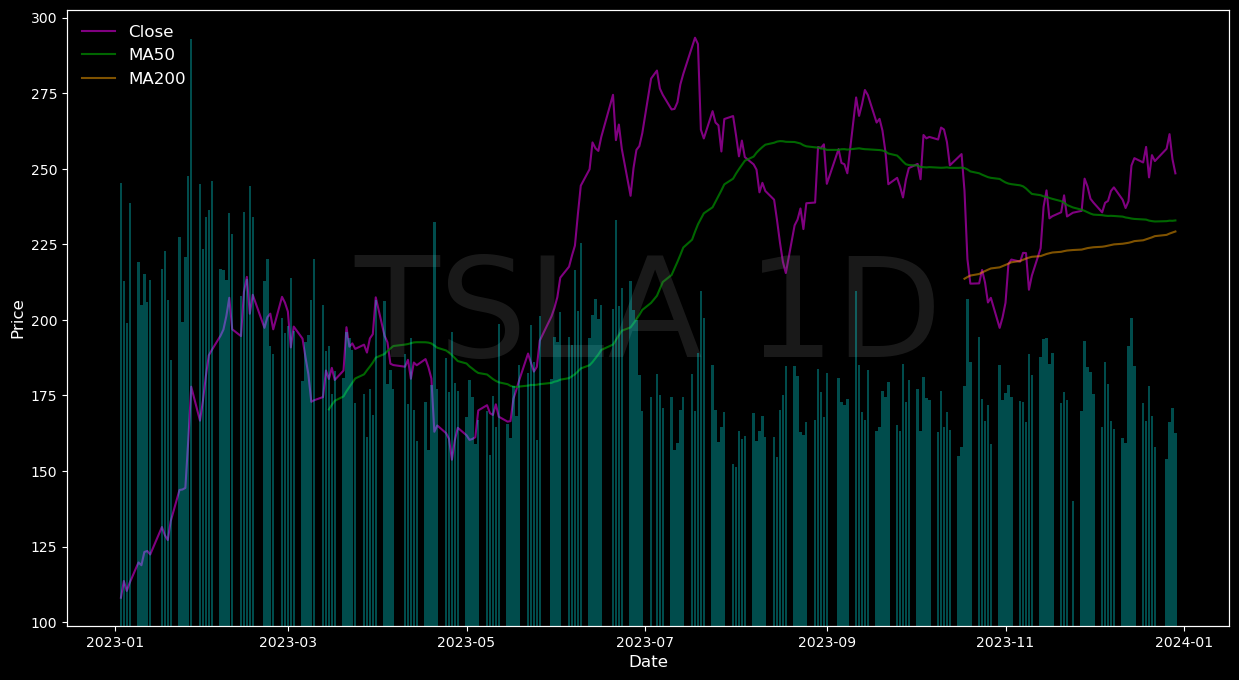

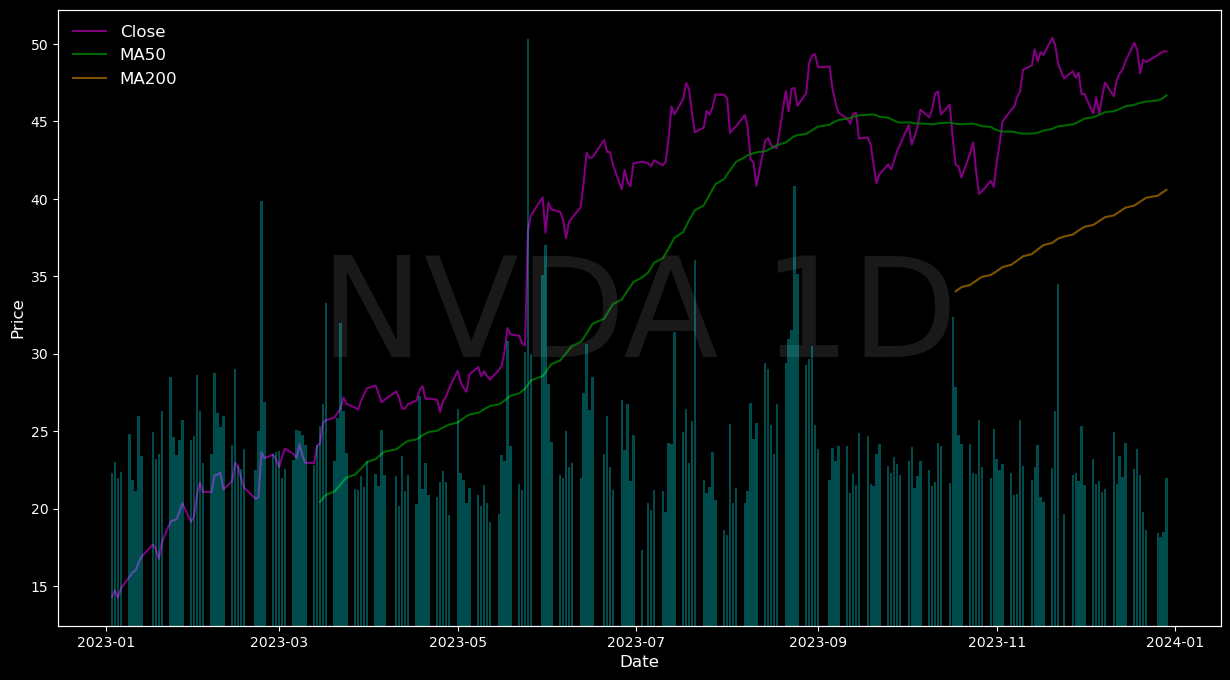

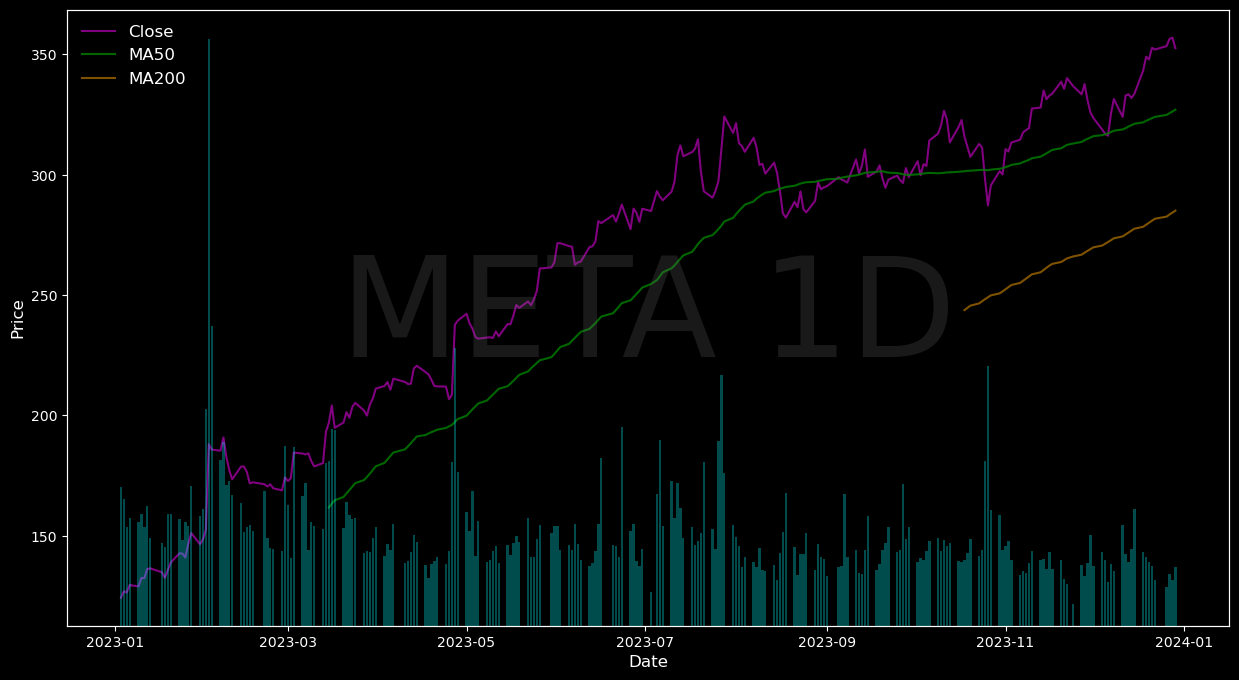

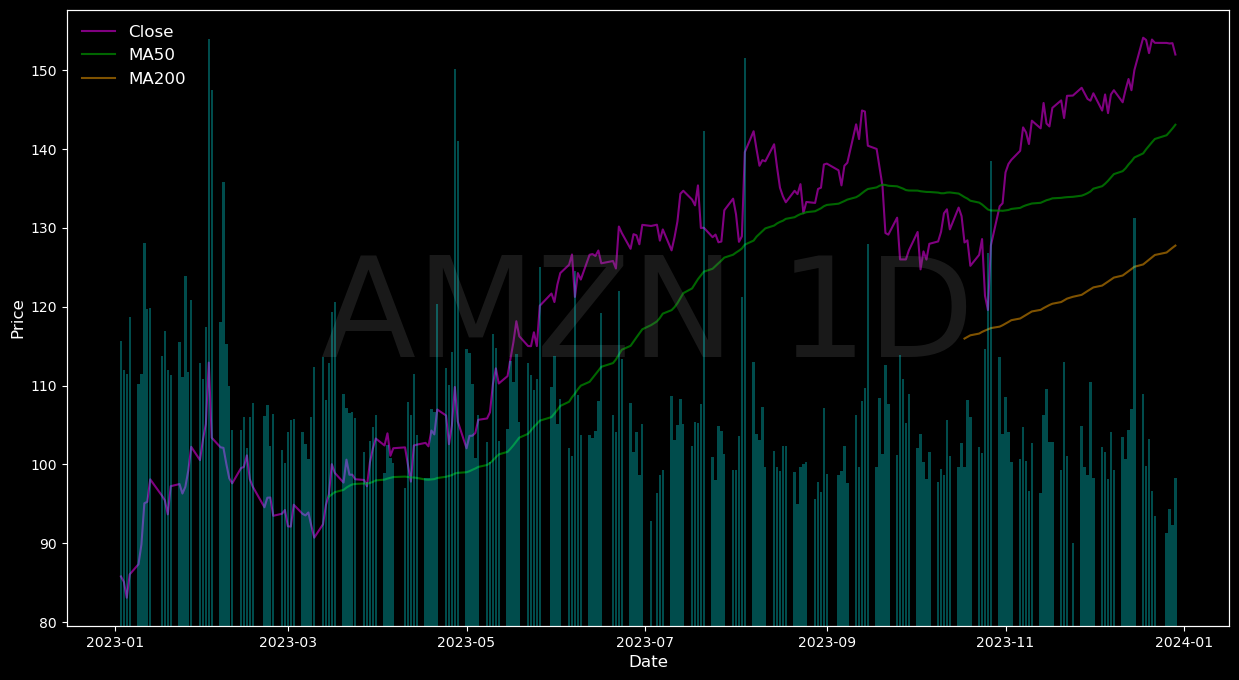

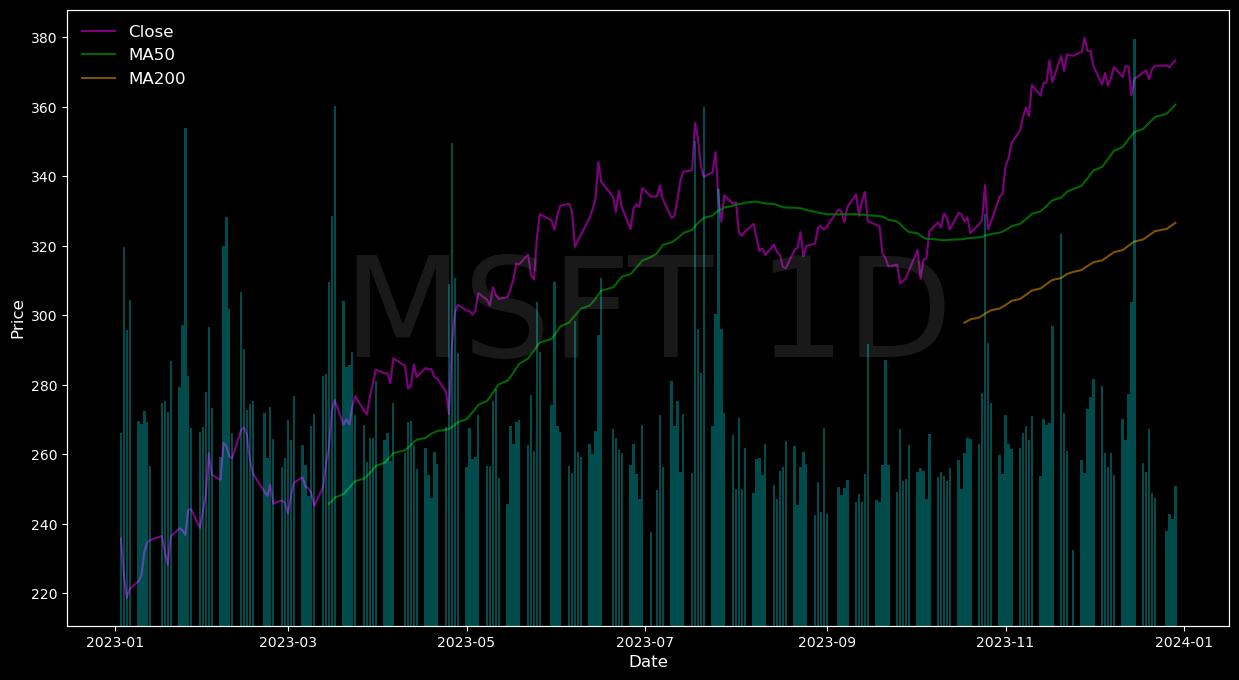

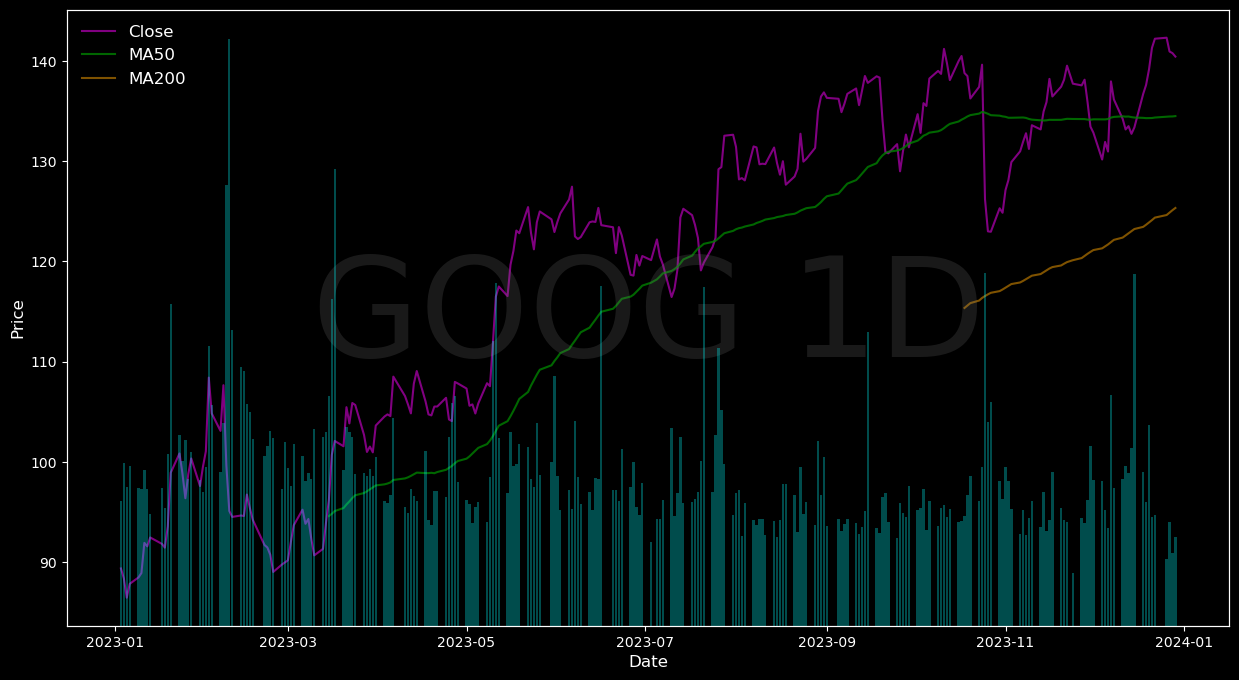

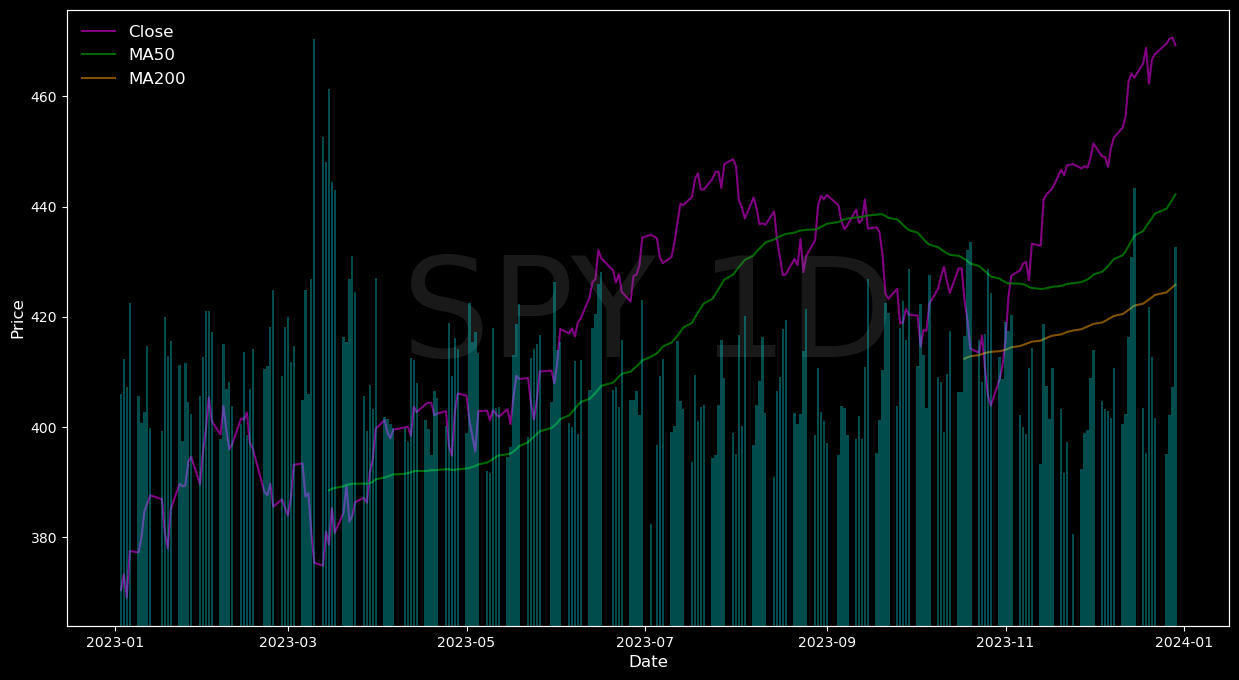

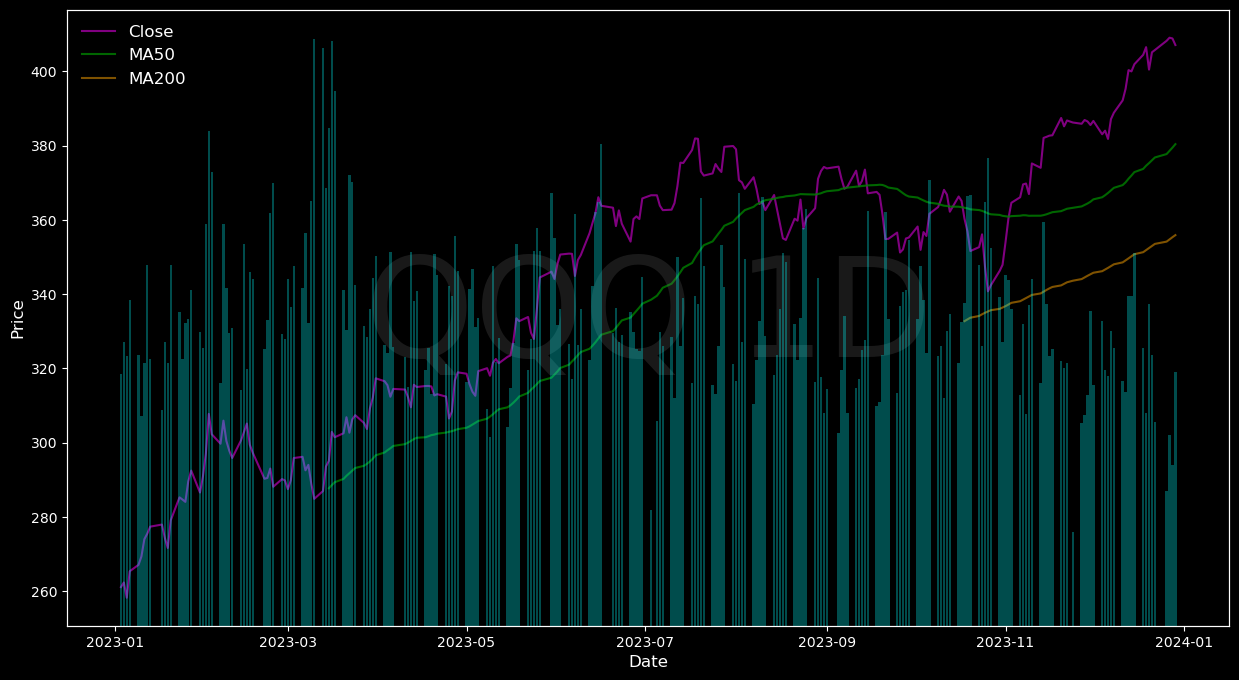

In [8]:
ma50 = 50
ma200 = 200

stock_data = df.set_index("Date")

for ticker in tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['MA50'] = ticker_data['Close'].rolling(window=ma50).mean()
    ticker_data['MA200'] = ticker_data['Close'].rolling(window=ma200).mean()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(ticker_data.index, ticker_data['Close'], label = 'Close', color = 'purple')
    ax.plot(ticker_data.index, ticker_data['MA50'], label = 'MA50', alpha=0.8,color = 'green')
    ax.plot(ticker_data.index, ticker_data['MA200'], label = 'MA200', alpha=0.5,color = 'orange')
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price', fontsize=12)
    ax.legend(loc='upper left', fontsize=12, frameon=False)
    ax.text(0.5, 0.5, ticker + ' 1D', fontsize=100, color='gray', alpha=0.2, ha='center', va='center', transform=ax.transAxes)

    ax2 = ax.twinx()
    ax2.bar(ticker_data.index, ticker_data['Volume'], color = 'cyan', alpha=0.3, width=0.8,label='Volume')
    ax2.set_yticks([])
    plt.style.use('dark_background')
    plt.show()

    

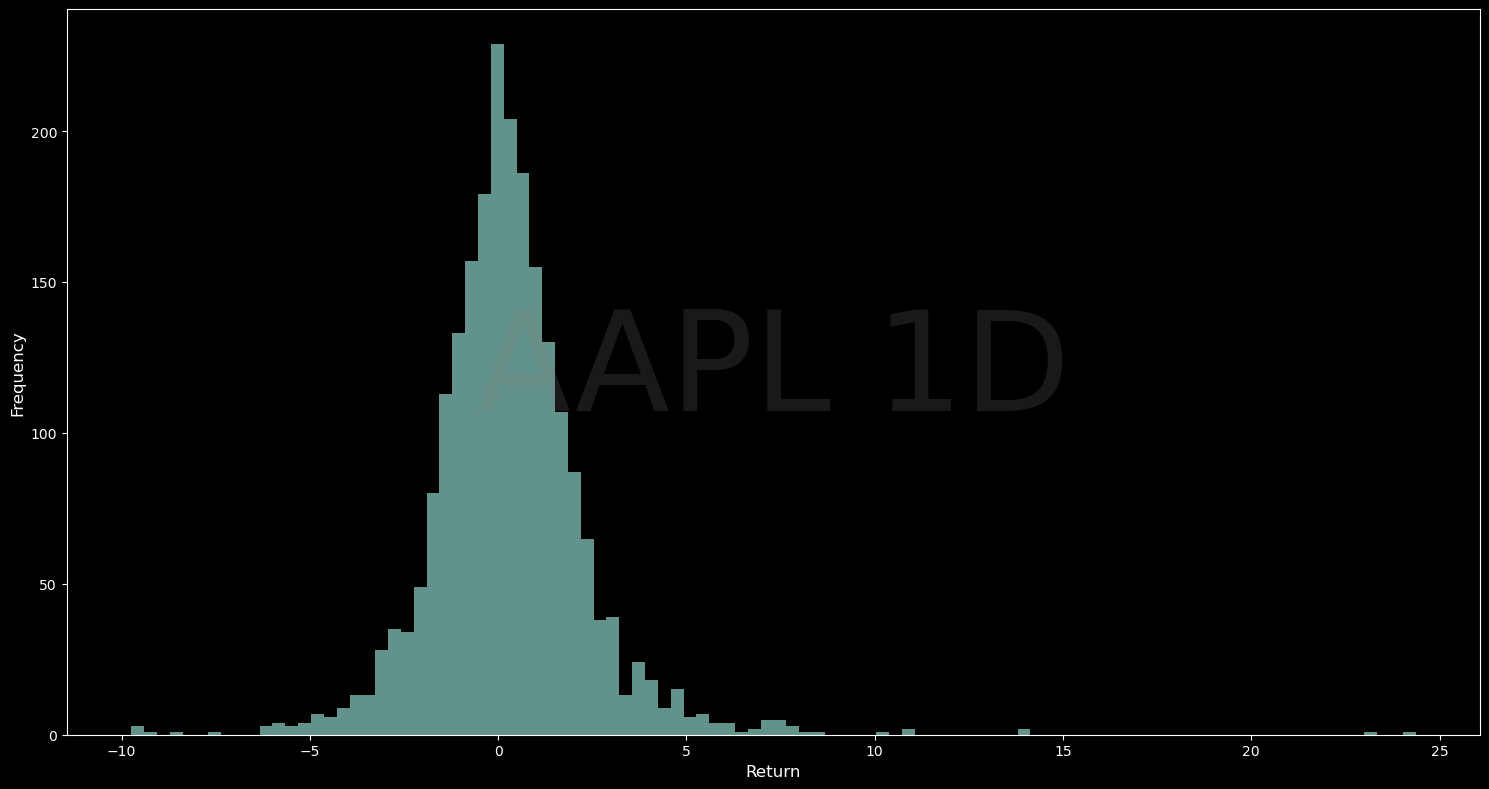

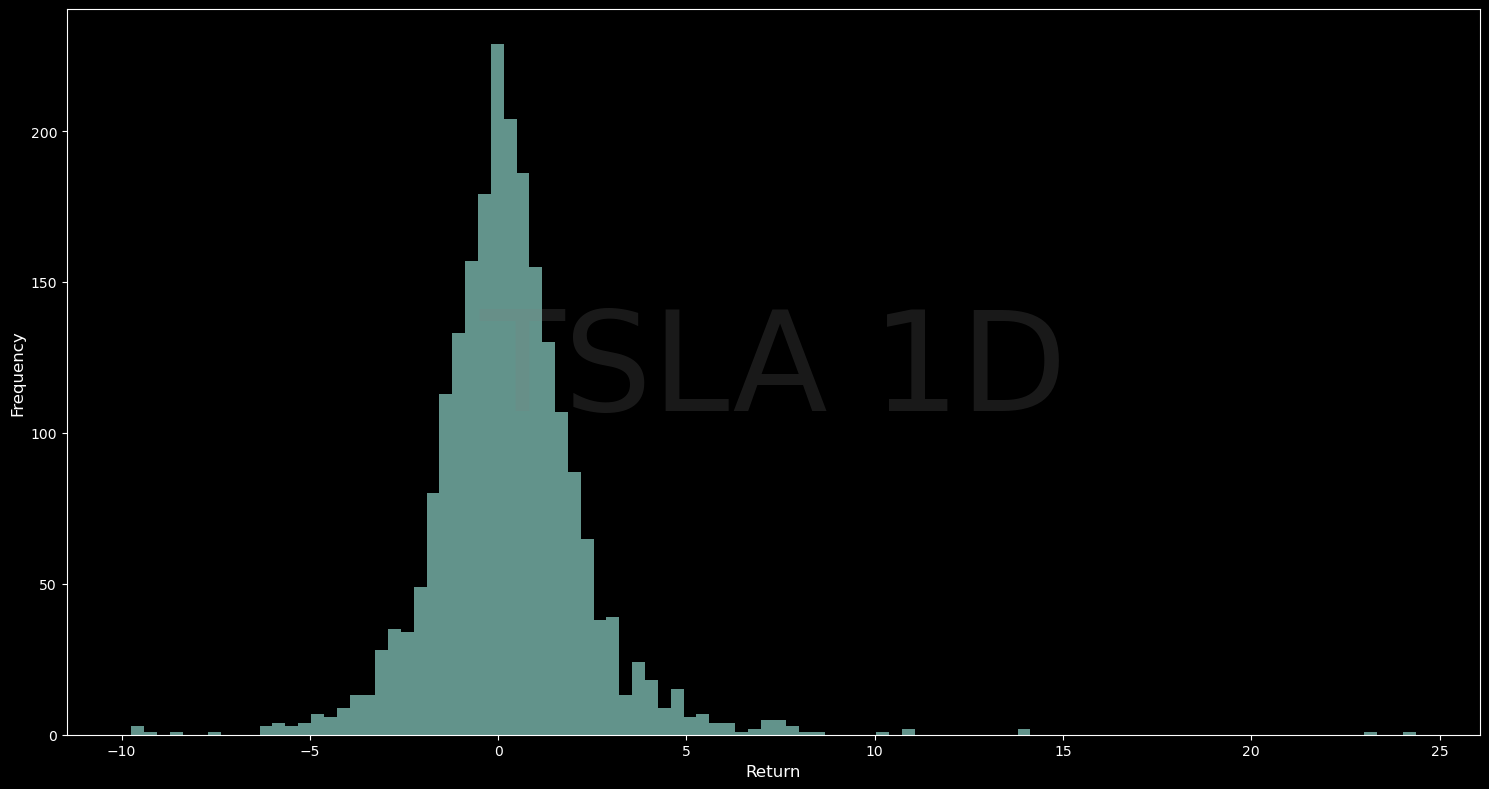

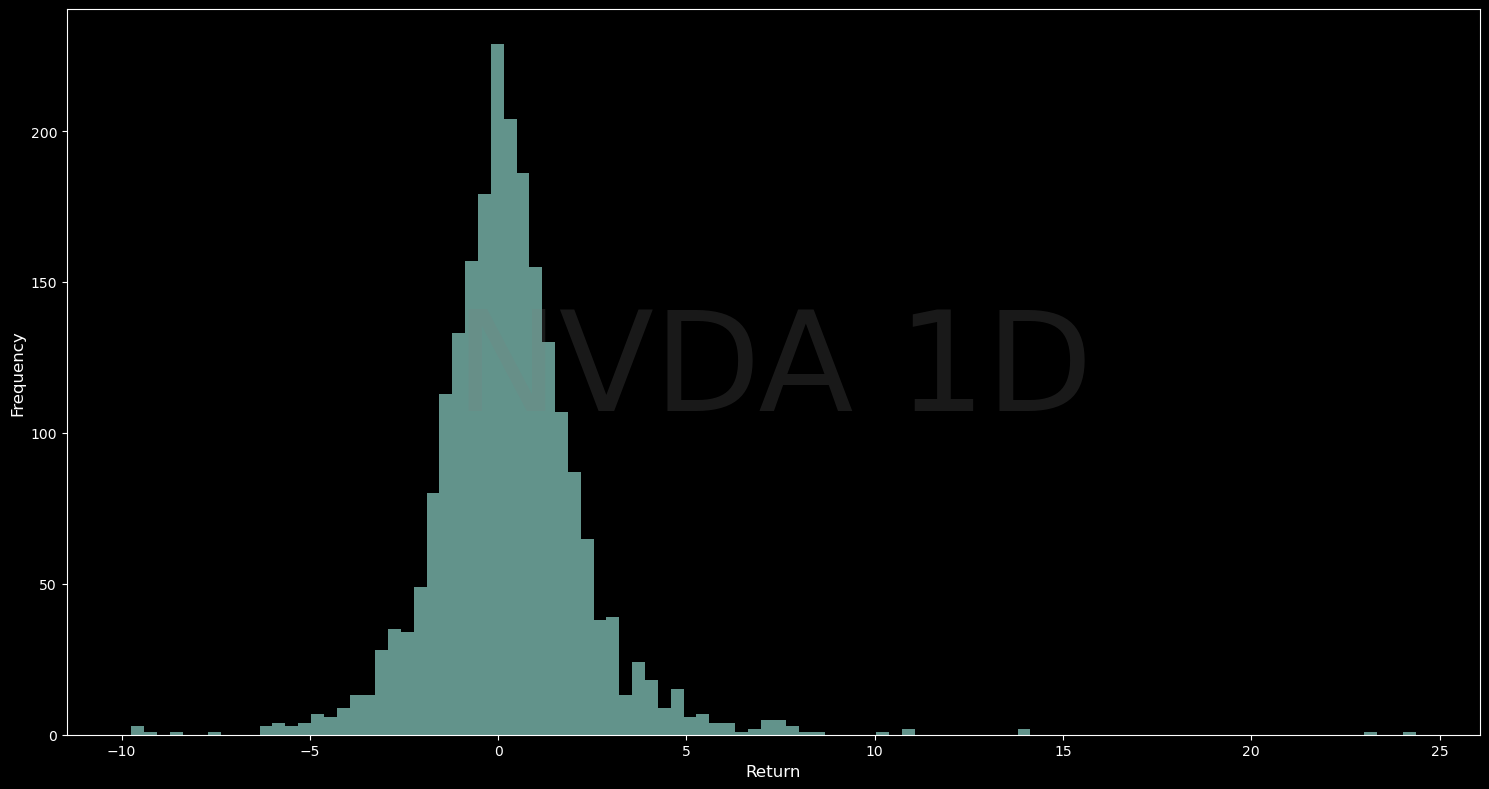

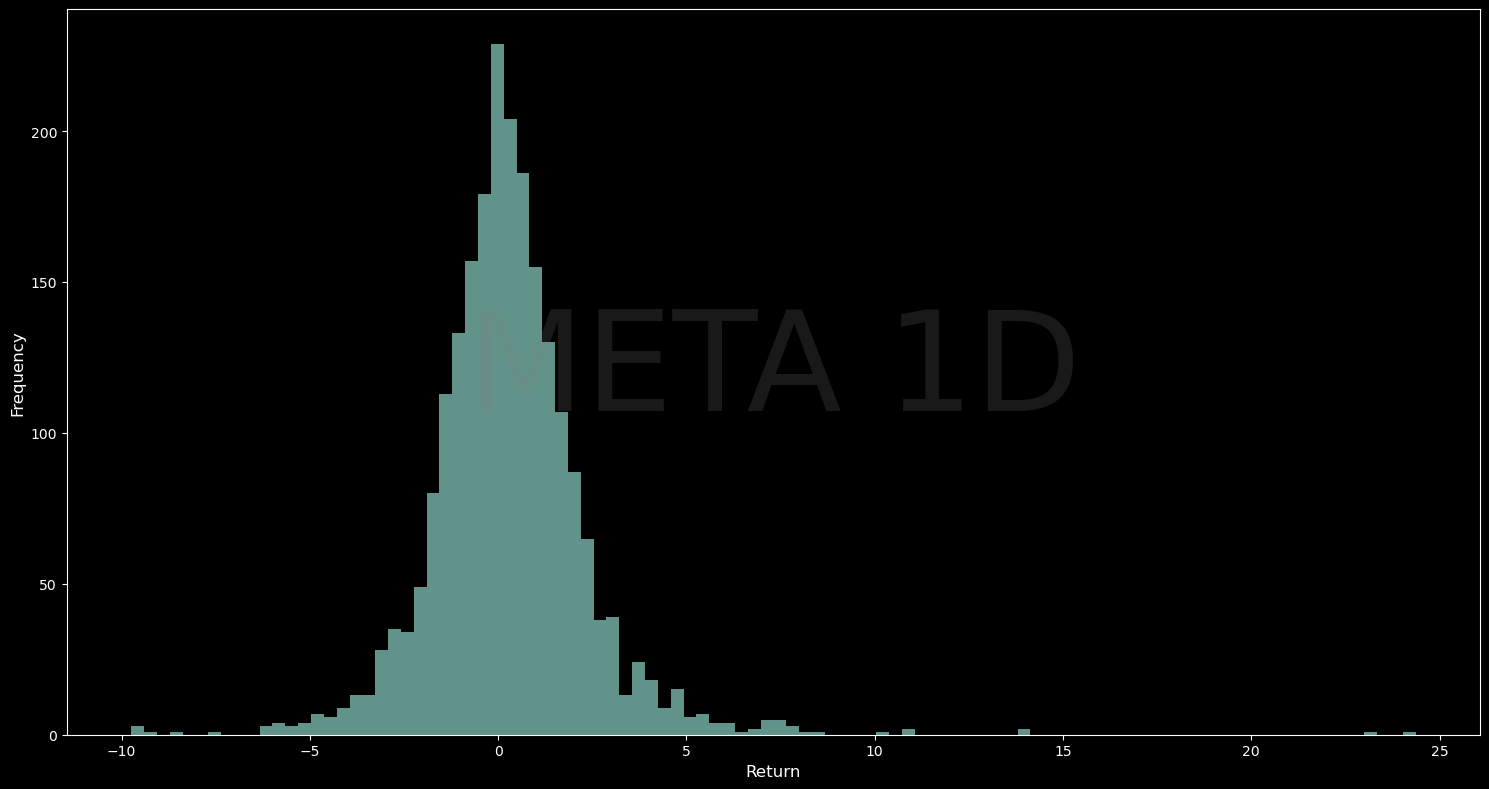

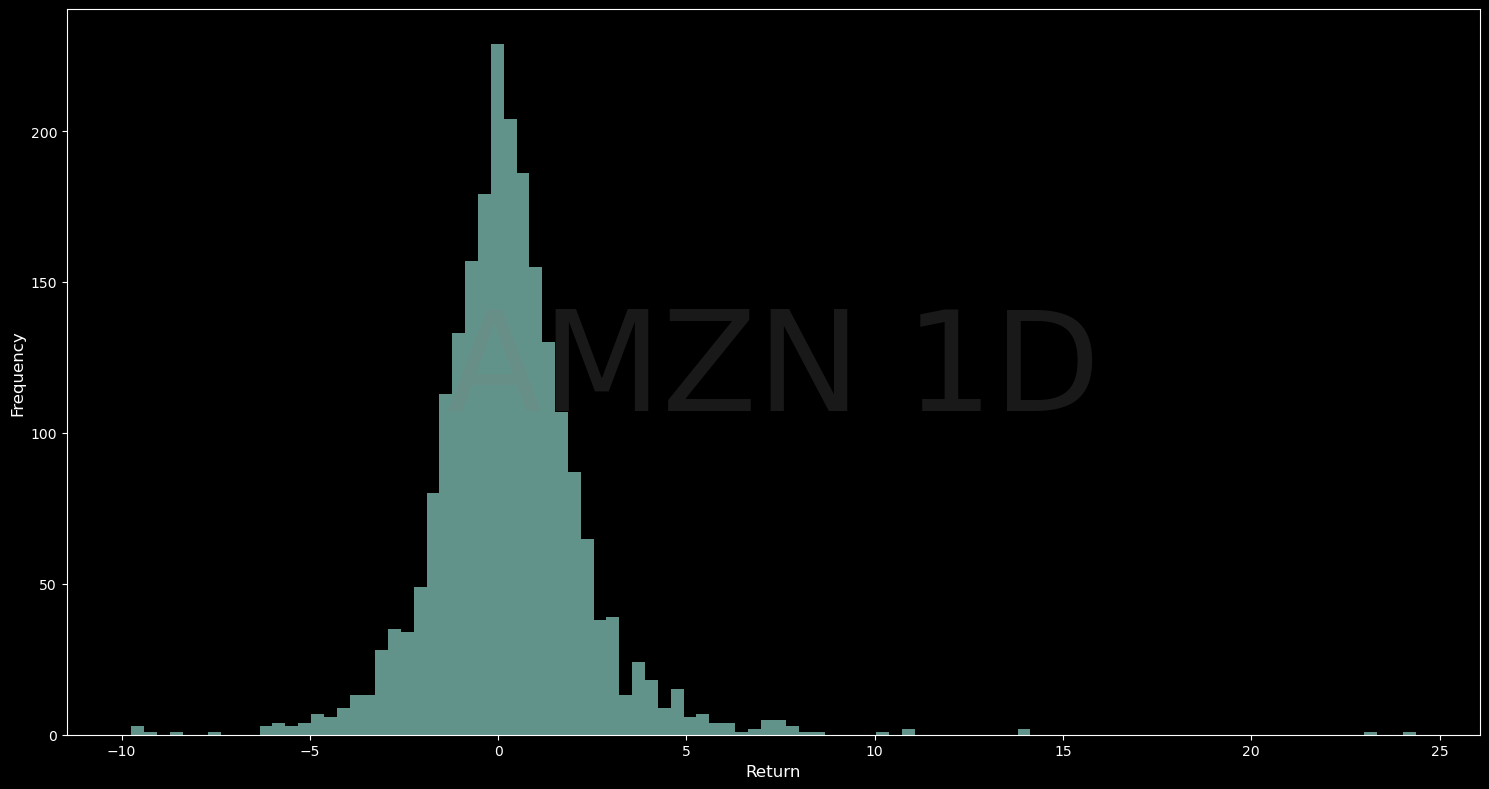

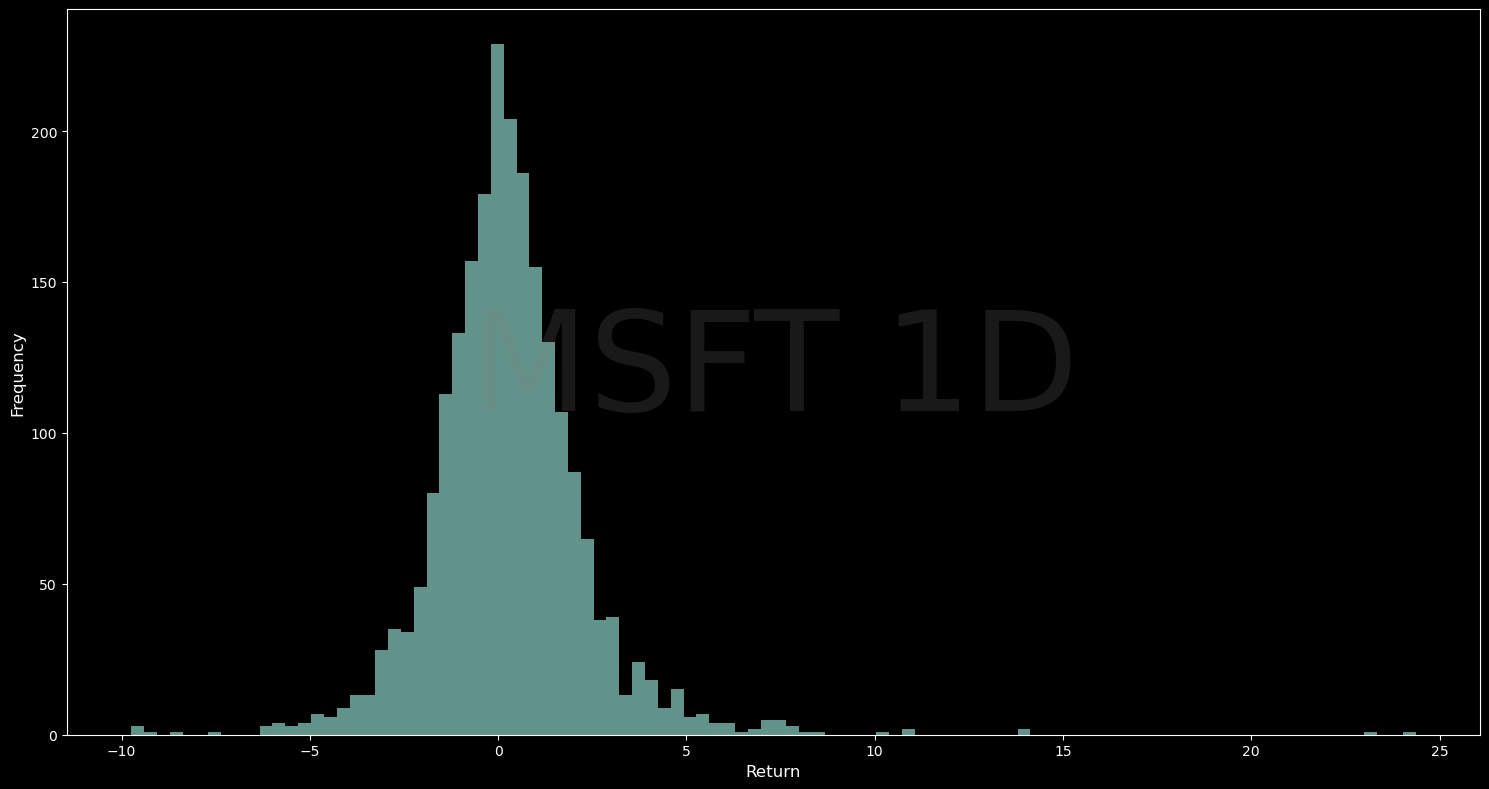

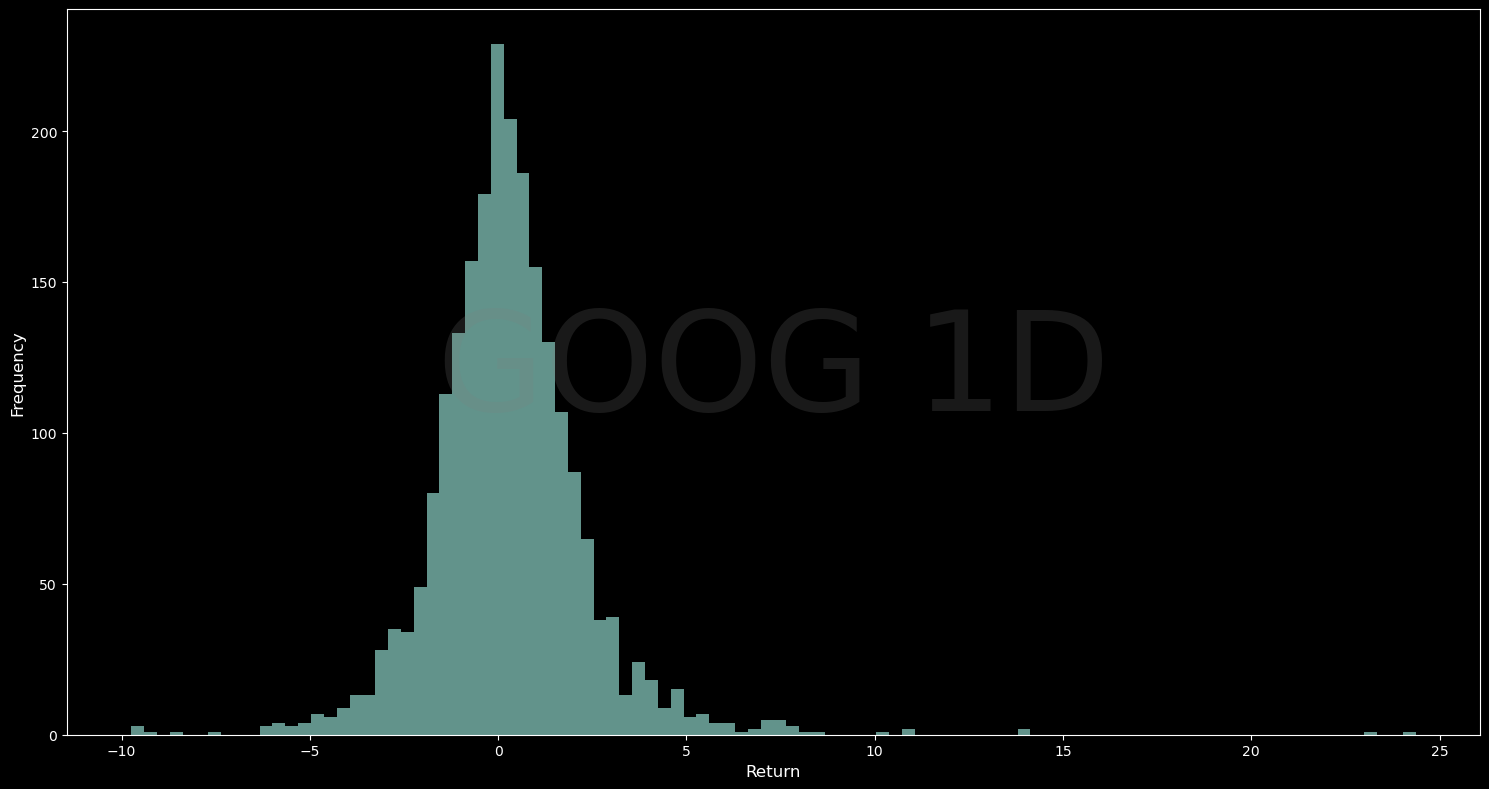

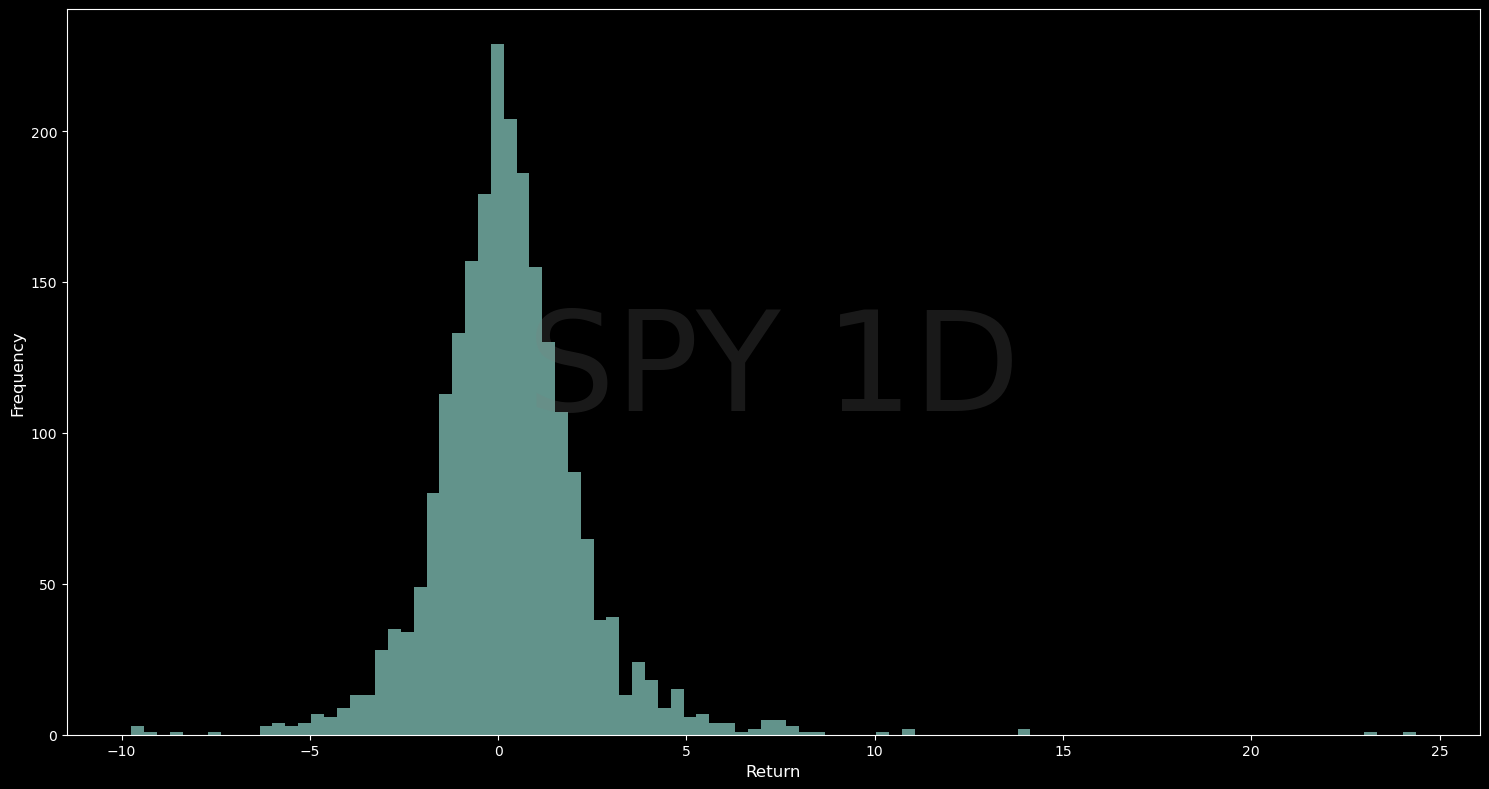

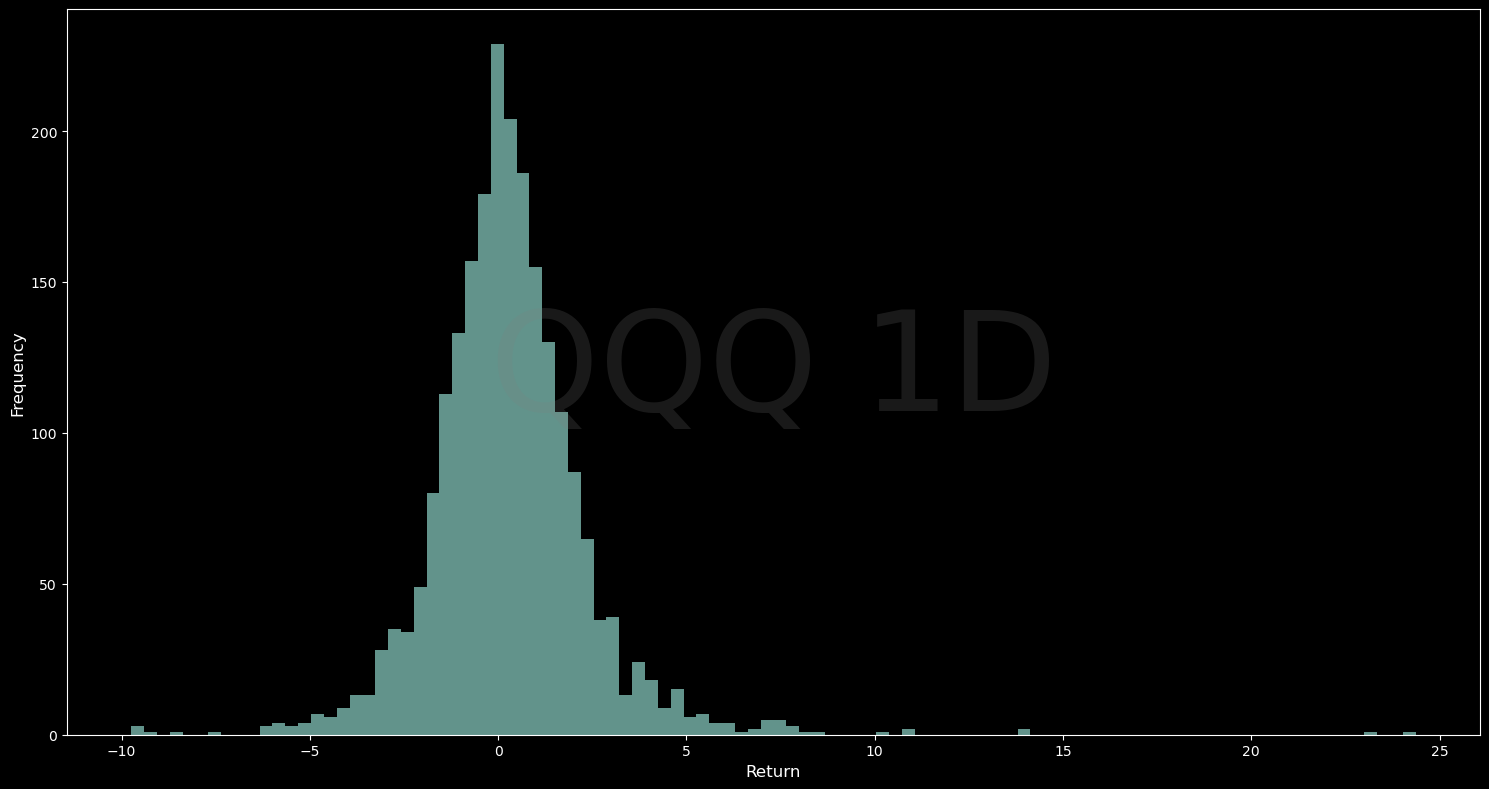

In [9]:
daily = stock_data.copy()
daily['Daily Return'] = daily.groupby('Ticker')['Close'].pct_change()*100

for ticker in tickers:
    ticker_data = daily[daily['Ticker'] == ticker].copy()
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_xlabel('Return', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.text(0.5, 0.5, ticker + ' 1D', fontsize=100, color='gray', alpha=0.2, ha='center', va='center', transform=ax.transAxes)
    ax.hist(daily['Daily Return'].dropna(), bins = 100, alpha = 0.7)
    plt.style.use('dark_background')
    plt.tight_layout()
    plt.show()

## Asset Performance

In [10]:
daily_return = daily.pivot_table(index='Date', columns='Ticker', values='Daily Return')
avg_return = daily_return.mean()

returns = stock_data.groupby("Ticker")["Close"].agg(["first", "last"])
returns['Return (%)'] = (returns['last'] - returns['first'])*100/returns['first']
returns.sort_values('Return (%)', ascending=False)

,first,last,Return (%)
Ticker,,,
NVDA,14.304595,49.507965,246.098335
META,124.265312,352.613068,183.758244
TSLA,108.099998,248.479996,129.861239
AMZN,85.820000,151.940002,77.044981
MSFT,235.711716,373.248871,58.349732
GOOG,89.378853,140.425430,57.112590
QQQ,261.113464,407.100708,55.909504
AAPL,123.632530,191.380966,54.798228
SPY,370.367889,469.290253,26.709217


In [11]:
div = pd.DataFrame(df.groupby('Ticker')['Dividend'].sum())
div.sort_values('Dividend', ascending=False)

,Dividend
Ticker,
SPY,6.633
MSFT,2.790
QQQ,2.536
AAPL,0.950
NVDA,0.016
AMZN,0.000
GOOG,0.000
META,0.000
TSLA,0.000


In [12]:
returns['Return + div (%)'] = (returns['last'] + div['Dividend'] - returns['first'])*100/returns['first']
returns = returns.sort_values('Return (%)', ascending=False).reset_index()
returns

,Ticker,first,last,Return (%),Return + div (%)
0,NVDA,14.304595,49.507965,246.098335,246.210187
1,META,124.265312,352.613068,183.758244,183.758244
2,TSLA,108.099998,248.479996,129.861239,129.861239
3,AMZN,85.820000,151.940002,77.044981,77.044981
4,MSFT,235.711716,373.248871,58.349732,59.533382
5,GOOG,89.378853,140.425430,57.112590,57.112590
6,QQQ,261.113464,407.100708,55.909504,56.880730
7,AAPL,123.632530,191.380966,54.798228,55.566634
8,SPY,370.367889,469.290253,26.709217,28.500139


**💡Conclusion:**
- `SPY` underperforms compared to other assets in the portfolio
- `QQQ` provides an optimal balance between risk and return.
- `NVDA` outperforms all assets significantly
- `META` and `TSLA`also provide strong returns
- `GOOG` and `AMZN` show moderate performance
- `AAPL` and `MSFT` exhibit stable yet lower returns

**This analysis highlights that while `SPY` underperforms, `QQQ` emerges as a strong candidate for risk-adjusted optimal returns, making it a potentially superior choice for portfolio construction.** 🚀

## Time for Calculate optimal Risk and Return for our Portfolio

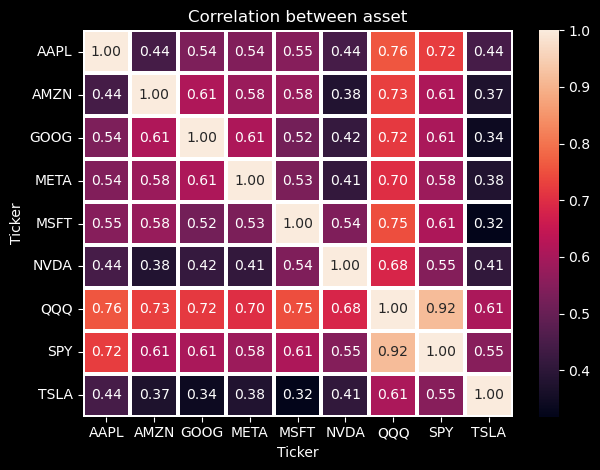

In [13]:
daily_corr = daily_return.corr()
sns.heatmap(daily_corr, annot=True, linewidths=1.5,fmt='.2f')
plt.title('Correlation between asset')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Only SPY & QQQ has high correlation with every stocks**

**1. Expected Return (𝜇)**
Expected return dihitung sebagai rata-rata return harian:

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} r_i
$$

**2. Volatility (𝜎)**
Volatility diukur dengan standard deviation dari return harian:

$$
\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (r_i - \mu)^2}
$$

**3. Expected Portfolio Return (E(R_p))**
Jika terdapat bobot investasi \( w_i \) untuk setiap saham \( i \), maka expected return portofolio:

$$
E(R_p) = \sum_{i=1}^{n} w_i \cdot \mu_i
$$

**4. Portfolio Volatility (𝜎_p)**
Volatilitas portofolio dihitung dengan covariance matrix \( \Sigma \):

$$
\sigma_p = \sqrt{ w^T \cdot \Sigma \cdot w }
$$


In [14]:
expected_return = daily_return.mean() * len(daily_return)
volatility = daily_return.std() * np.sqrt(len(daily_return))
cov_matrix = daily_return.cov() * len(daily_return)

stock_stats = pd.DataFrame({
    'Expected Return': expected_return,
    'Volatility': volatility
})

stock_stats = pd.merge(stock_stats, returns, on='Ticker', how='inner')
stock_stats[['Ticker', 'Expected Return','Return + div (%)', 'Volatility']]

,Ticker,Expected Return,Return + div (%),Volatility
0,AAPL,45.689687,55.566634,19.835200
1,AMZN,62.536211,77.044981,32.829506
2,GOOG,49.844118,57.112590,30.428493
3,META,111.879866,183.758244,39.591120
4,MSFT,49.094346,59.533382,24.970386
5,NVDA,135.500781,246.210187,48.167312
6,QQQ,46.019762,56.880730,17.774150
7,SPY,24.526410,28.500139,13.013311
8,TSLA,96.928792,129.861239,52.334450


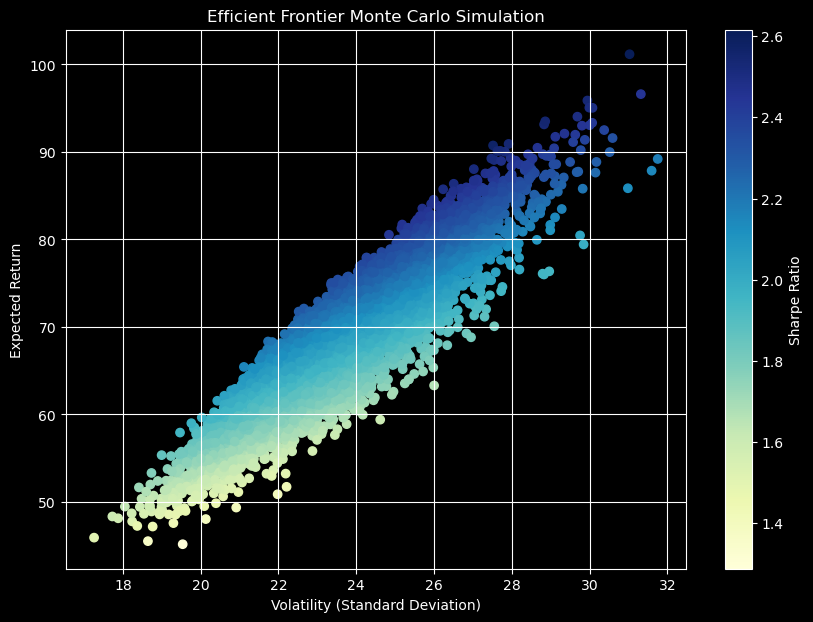

In [15]:
np.random.seed(1)
num_portfolio = 10000
results = np.zeros((3, num_portfolio))
risk_free = 20 #BTC = 30, SPY = 51(for this case) ~I did the return and volatile in %

def epf_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

for i in range(num_portfolio):
    weights = np.random.random(len(daily['Ticker'].unique()))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = epf_performance(weights, expected_return, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (portfolio_return - risk_free)/portfolio_volatility


# print(results[0])
# print(results[1])
# print(results[2])
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier Monte Carlo Simulation')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [16]:
max_sharpe_idx = np.argmax(results[2])
max_return = results[0, max_sharpe_idx]
max_risk = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]
print(f"Expected Return: ~{max_return:.2f}%")
print(f"Volatility: ~{max_risk:.2f}%")
print(f"Sharpe Ratio: ~{max_sharpe_ratio:.2f}")


Expected Return: ~101.17%
Volatility: ~31.03%
Sharpe Ratio: ~2.62


Find the weight of the best Sharpe Ratio

In [17]:
np.random.seed(1)
best_weight = np.zeros(len(daily['Ticker'].unique()))
results = np.zeros((3, num_portfolio))

for i in range(num_portfolio):
    weights = np.random.random(len(daily['Ticker'].unique()))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = epf_performance(weights, expected_return, cov_matrix)
    results[2, i] = (portfolio_return - risk_free)/portfolio_volatility

    if results[2, i] == max_sharpe_ratio:
        best_weight = weights
        break

portfolio_final = pd.DataFrame({
    'Ticker': tickers,
    'Weight': best_weight*100
})

portfolio_final

,Ticker,Weight
0,AAPL,3.242128
1,TSLA,0.209222
2,NVDA,7.805431
3,META,33.509170
4,AMZN,0.651500
5,MSFT,27.698725
6,GOOG,8.790575
7,SPY,1.733587
8,QQQ,16.359662


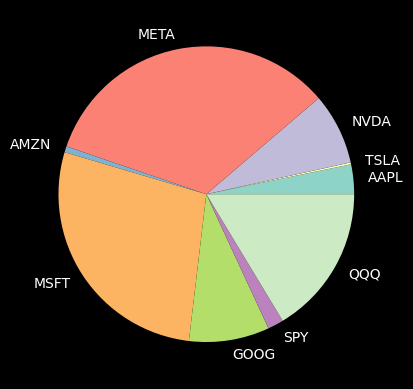

In [ ]:
plt.pie(portfolio_final['Weight'], labels=portfolio_final['Ticker'])

plt.show()